# Autoregressive Linear Model for Time Series Prediction

The emphasis of this lab is correct data processing for proper time series prediction using an autoregressive linear model.

We explore two ways in this lab: the incorrect way, which accidentally involves data snooping, and the correct way, which uses predictions to make further predictions.

The appropriate method is to rely solely on the information that is available upto the point of prediction, i.e. the training data and the model's previous outputs. Consider the following split, for example:

Training data set: $\{x_0, x_1, x_2\}$
Tesing data set: $\{x_3, x_4, x_5 \}$

Now suppose we want to forecast for $\{x_6, x_7 \}$.

The incorrect method would snoop points from the testing dataset to predict the subsequent data points that we need to forecast. The right way, however, would be to use ONLY our training set, and using the predictions we make $\{\hat{x_3}, \hat{x_4},\hat{x_5} \}$.

I learned this critical difference as I was going through the PACKT deep learning specialization.

Without further ado, let's begin!

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Build the Dataset

We'll be using synthetic data for this demonstration, throwing in a noise term to show the difference between the two approaches more starkly. Feel free to comment out the noise term to see what would happen in its absence.


In [45]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# Visualizing our data

# We want to use the past T values to predict the next T values.
T = 10
X = []
Y = []

# We would therefore have N-T arrays inside our training set.
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)

N = len(X)

print(f"Shape (X): {X.shape}, Shape (Y): {Y.shape}")


Shape (X): (190, 10), Shape (Y): (190,)


## Build the Model

Now, we build our autoregressive model.

In [49]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)

model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

# Fit on half the data, validate on quarter of the data.
result = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=75
)

Epoch 1/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4686  
Epoch 2/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1386 
Epoch 3/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0982 
Epoch 4/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0441 
Epoch 5/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0488 
Epoch 6/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0697 
Epoch 7/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0507 
Epoch 8/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0429 
Epoch 9/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0307 
Epoch 10/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0245 
Epoch 11/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0262 
Epoch 12/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0260 
Epoch 13/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0255 
Epoch 14/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0251 
Epoch 15/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0210 
Epoch 16/75
3/3 ━━━━━━━━━━━━━━━━━

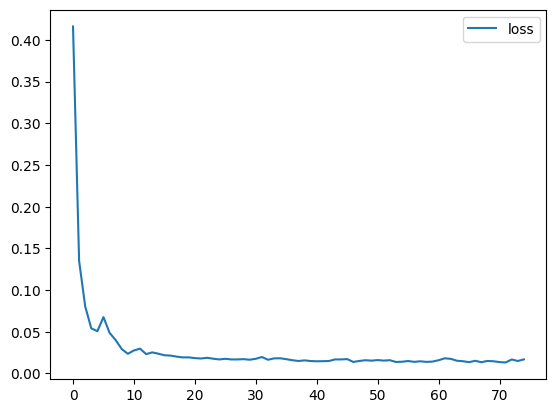

In [50]:
# As always, let's visualize the loss per iteration to see
# if the learning_rate needs adjustments

plt.plot(result.history['loss'], label='loss')
plt.legend()
plt.show()

## Use the Model to Forecast

Now, we're ready to see the outputs of both forecasting approaches.

### The Incorrect Way, Using True Targets

In [51]:
 test_target = Y[-N//2:]
 test_pred = []

 # index of first test input
 i = -N//2

 while len(test_pred) < len(test_target):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i += 1
  test_pred.append(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

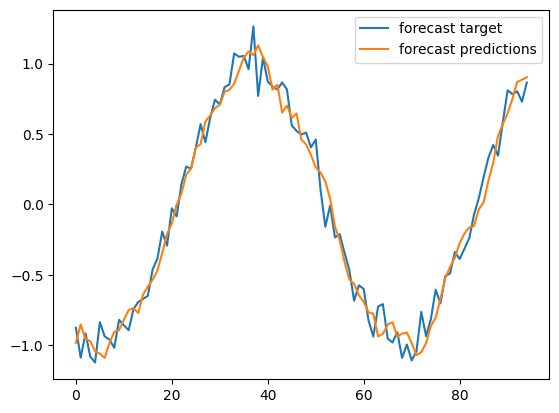

In [52]:
plt.plot(test_target, label='forecast target')
plt.plot(test_pred, label='forecast predictions')
plt.legend()

### The Correct Way, Using Self-Predicted Targets

In [53]:
test_target = Y[-N//2:]
test_pred = []

# last training input
last_x = X[-N//2] # 1D array of T elements

while len(test_pred) < len(test_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] # 1x1 array -> scalar

  test_pred.append(p)

  # add our prediction as the new input
  last_x = np.roll(last_x, -1) # works like a left-shift
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

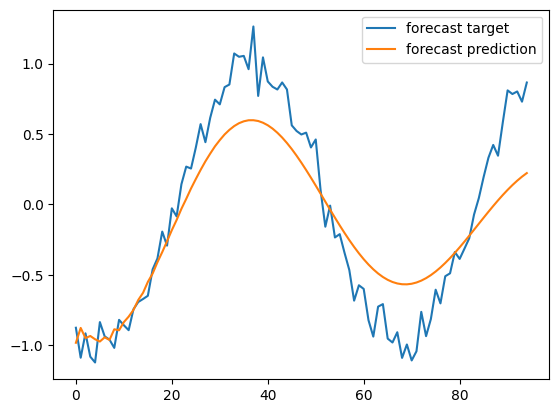

In [54]:
plt.plot(test_target, label='forecast target')
plt.plot(test_pred, label='forecast prediction')
plt.legend()

The difference is stark when we introduce noise into the system. When developing models for forecasting, it is crucial to avoid data snooping as that can lead to overfitting and inaccurate assessment of model reliability.

## Conclusion


In summary, carefully handling the forecasting pipeline, right from data preparation to the autoregressive prediction loop, is essential for building reliable time series models. This exercise underscores the importance of not "leaking" future or test information into the forecasting process, as doing so leads to unrealistically optimistic results. By sticking to strictly self-generated predictions beyond the training window, we ensure our model evaluation remains valid and meaningful.
